# Photo Classifier: Model evaluation

## Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
%load_ext autoreload
%autoreload 2
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
from file_io import load_pickle_file
from constants import *
from image_transforms import IMAGE_TRANSFORMS
from interpreters.utils import get_interpreter

In [4]:
import random
random.seed(42)

In [5]:
DATA_SET = 'test'

## Load model and data

In [6]:
model = load_pickle_file(MODEL_FILE_PATH)
image_data = load_pickle_file(IMAGE_DATA_PATH)

## Prediction

In [7]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [8]:
y_pred, probabilities = model.predict(x, IMAGE_TRANSFORMS[DATA_SET])

## Results interpretation

In [9]:
Interpreter = get_interpreter(IS_MULTILABEL_CLASSIFICATION)
interpreter = Interpreter(x, y_pred, y_true, probabilities, model.class_to_label_mapping)

In [10]:
accuracy = interpreter.calculate_accuracy()
accuracy

0.967741935483871

In [11]:
accuracy_by_label = interpreter.calculate_accuracy_by_label()
accuracy_by_label

Grizzly bears    1.000000
Black bears      0.916667
Teddybears       1.000000
dtype: float64

In [12]:
confusion_matrix = interpreter.calculate_confusion_matrix()
confusion_matrix

,Grizzly bears,Black bears,Teddybears
Grizzly bears,1.000000,0.000000,0.0
Black bears,0.083333,0.916667,0.0
Teddybears,0.000000,0.000000,1.0


In [13]:
most_incorrect_samples = interpreter.get_most_incorrect_samples(5)
most_incorrect_samples

,Grizzly bears propability,Black bears propability,Teddybears propability,true,predicted,error,confidence
18,0.901323,0.085071,0.013606,[Black bears],[Grizzly bears],0.609952,0.854230
72,0.894179,0.105670,0.000151,[Black bears],[Grizzly bears],0.596220,0.846216
32,0.542656,0.424630,0.032714,[Black bears],[Grizzly bears],0.383580,0.462368
1,0.347717,0.652247,0.000036,[Black bears],[Black bears],0.231835,0.565243
58,0.238217,0.077081,0.684702,[Teddybears],[Teddybears],0.210199,0.545214


In [14]:
most_uncertain_samples = interpreter.get_most_uncertain_samples(5)
most_uncertain_samples

,Grizzly bears propability,Black bears propability,Teddybears propability,true,predicted,error,confidence
32,0.542656,0.424630,0.032714,[Black bears],[Grizzly bears],0.383580,0.462368
58,0.238217,0.077081,0.684702,[Teddybears],[Teddybears],0.210199,0.545214
1,0.347717,0.652247,0.000036,[Black bears],[Black bears],0.231835,0.565243
85,0.196947,0.783898,0.019154,[Black bears],[Black bears],0.144068,0.693165
6,0.188262,0.811290,0.000448,[Black bears],[Black bears],0.125807,0.735154


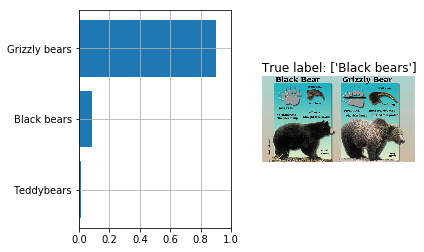

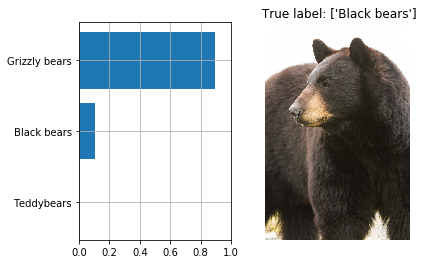

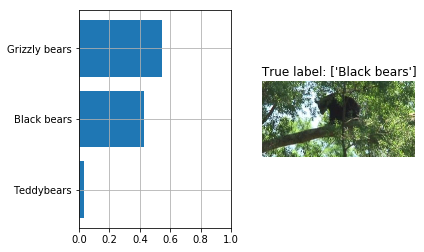

In [15]:
interpreter.plot_most_incorrect_samples(3)

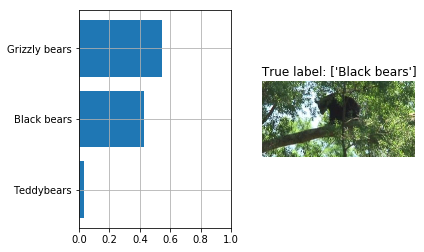

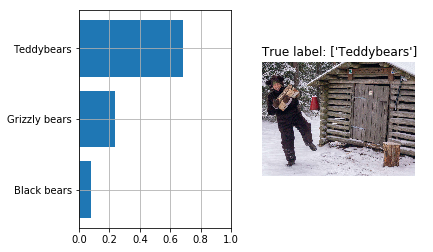

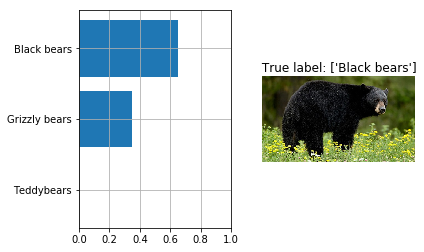

In [16]:
interpreter.plot_most_uncertain_samples(3)

In [17]:
@interact(index=widgets.IntSlider(min=0, max=len(y_true)-1, step=1, value=0, continuous_update=False))
def show_prediction(index=0):
    interpreter.plot_prediction(index)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=92), Output()), _do…